In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
frozen_model='frozen_inference_graph.pb'

In [7]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)   #deep nural network-detection model

In [6]:
classLabels=[]                                        #creating empty list and assigning labels
file_name= 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'tree', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier']


In [9]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)               #255/2=127.5
model.setInputMean((127.5,127.5,127.5))      #mobilenet => [-1,1]
model.setInputSwapRB(True)


<dnn_Model 00000000082BC690>

# reading image


In [11]:
img = plt.imread('2.jpg')

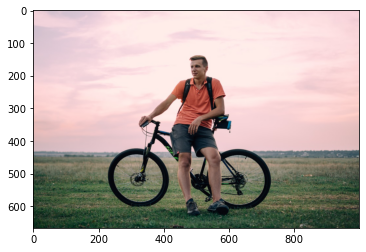

In [12]:
plt.imshow(img,cmap='gray')  #by default bgr

In [13]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)

In [14]:
print(ClassIndex)

[[ 1]
 [ 2]
 [ 1]
 [27]]


# FLATTENING

In [15]:
font_scale=2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),4)             #cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=4)

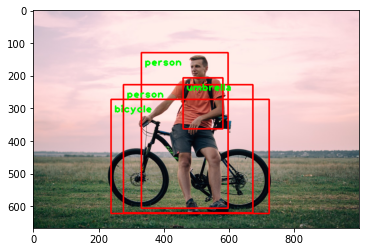

In [16]:
plt.imshow(img,cmap='gray')

# Reading video

In [22]:
vid = cv2.VideoCapture("26.mp4")

In [23]:
#to check is video opened correctly
if not vid.isOpened():
    vid = cv2.VideoCapture(0)
if not vid.isOpened():
    raise IDError("cannot open video")
    
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = vid.read()
   
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold = 0.5)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)             #cv2.rectangle(image, start_point, end_point, color, thickness)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,
                            color=(0,255,0),thickness=4)
    
    cv2.imshow('objectdetection',frame)
    
    key=cv2.waitKey(1)
#    if (cv2.waitkey(2) & 0xFF == ord('q')):
#        break

    if key==ord('q'):
        break   

        vid.release()
cv2.destroyAllWindows()

[[ 1]
 [19]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [19]]
[[ 1]
 [ 1]
 [19]
 [ 1]]
[[ 1]
 [19]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [19]
 [18]]
[[ 1]
 [ 1]
 [19]
 [ 1]]
[[1]
 [1]]
[[ 1]
 [19]
 [ 1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [19]
 [18]]
[[ 1]
 [19]
 [ 1]]
[[ 1]
 [19]
 [19]]
[[ 1]
 [42]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [42]]
[[ 1]
 [ 1]
 [19]]
[[ 1]
 [19]
 [ 1]]
[[ 1]
 [19]
 [ 1]]
[[ 1]
 [19]
 [ 1]]
[[ 1]
 [19]
 [ 1]]
[[ 1]
 [ 1]
 [19]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [19]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [19]
 [19]]
[[ 1]
 [ 1]
 [19]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [19]
 [19]]
[[ 1]
 [ 1]
 [ 1]
 [42]]
[[ 1]
 [ 1]
 [ 1]
 [42]]
[[ 1]
 [ 1]
 [ 1]
 [42]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [42]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]